### Import Libraries

In [1]:
import json #JSON manipulation
import time
import datetime
import re
from textblob import TextBlob
# VADER can be accessed by the NLTK library.
import nltk
# Download the VADAR tool and access it through the NLTK library.
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/uralmalik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from langdetect import detect
from tqdm import tqdm

In [5]:
import os
import seaborn as sns

### Load Dataset

In [6]:
# cd /Users/uralmalik/Downloads/OneDrive_1_02-04-2021/

/Users/uralmalik/Downloads/OneDrive_1_02-04-2021


In [6]:
temp = pd.read_csv('lyrics_only.csv')

In [7]:
temp = temp.drop('Unnamed: 0', axis =1)

In [8]:
temp.describe()

,lyrics
count,93627
unique,74979
top,"Last updated: 10/6/2018, 5:16PM MST OctoberOct..."
freq,548


### Language Detect

In [9]:
temp['Language']='unknown'

In [10]:
for i in tqdm(range(temp.shape[0])):
    try:
        temp.loc[i,'Language'] = detect(temp.loc[i,'lyrics'])
    except:
        # Positive indication that this song has been processed
        temp.loc[i, 'Language'] = 'unknown'
        pass

100%|██████████| 93629/93629 [12:58<00:00, 120.32it/s]


In [30]:
temp.to_csv('lyrics_language.csv')

In [7]:
temp = pd.read_csv('lyrics_language.csv').drop('Unnamed: 0', axis =1)

In [8]:
lyrics_eng = temp[temp['Language']=='en']

In [9]:
temp.isnull().sum()

lyrics      2
Language    0
dtype: int64

In [10]:
# lyrics_eng

In [11]:
temp.lyrics = temp.lyrics.astype(str)

In [12]:
temp.isnull().sum()

lyrics      0
Language    0
dtype: int64

In [13]:
list_lyrics = list(temp.lyrics)

### Additional Analysis Attempt

#### Check Text Length and Word Count

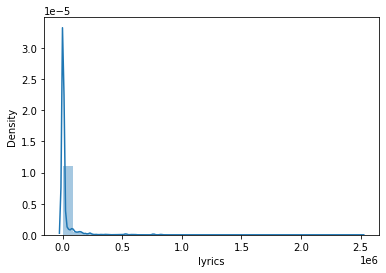

In [23]:
#Text Length
sns.distplot(temp.lyrics.apply(lambda text: len(text)), bins=30);

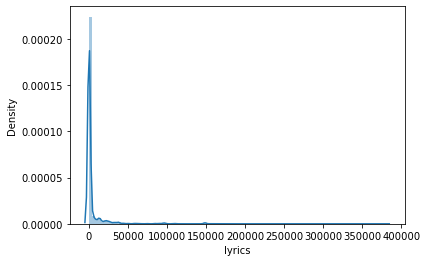

In [24]:
#Word Count
sns.distplot(temp.lyrics.apply(lambda text: len(text.split())), bins=100);

### Sentiment Analysis

In [14]:
temp_1 = temp.iloc[0:10,:]
temp_1

,lyrics,Language
0,"SCENE.—A great terrace in the Palace of Herod,...",en
1,Investigation of the Ferguson Police Departmen...,en
2,(10) Comme là on est où est on est on là. D...,fr
3,The Whitechapel Murder. During yesterda...,en
4,Le roi Renaud de guerre revient Portant ses tr...,fr
5,arethacrystal jukebox queen of hymn & him diff...,en
6,[ Produzido por Junked ] [Verso 1: Alex FULL]...,pt
7,I was just passing the time of day with old Tr...,en
8,HUYENDO DE LOS CIVILES UN GITANO DEL PERCHEL S...,pt
9,"(5) Au nom d'Annah la Toute buissante, l...",fr


In [15]:
sample_lyrics = list(temp_1.lyrics)

### VADER

In [16]:
# To be in jupyter notebook

import multiprocessing as mp
from ural_functions import sentiment_score_gen

In [17]:
# tqdm.pandas()  # <- added this line

In [18]:
# from tqdm.contrib.concurrent import process_map

In [38]:
%%time

if __name__ == '__main__':
    process = mp.Pool(processes = 4)
    sentiment_dict = process.map(sentiment_score_gen, tqdm([i for i in sample_lyrics]))

100%|██████████| 10/10 [00:00<00:00, 20.09it/s]


CPU times: user 12.2 ms, sys: 28.6 ms, total: 40.8 ms
Wall time: 3.27 s


In [20]:
sentiment_dict

[{'neg': 0.1, 'neu': 0.782, 'pos': 0.118, 'compound': 0.9997},
 {'neg': 0.125, 'neu': 0.802, 'pos': 0.073, 'compound': -1.0},
 {'neg': 0.019, 'neu': 0.97, 'pos': 0.011, 'compound': -0.9968},
 {'neg': 0.083, 'neu': 0.869, 'pos': 0.048, 'compound': -0.9996},
 {'neg': 0.0, 'neu': 0.979, 'pos': 0.021, 'compound': 0.7293},
 {'neg': 0.135, 'neu': 0.739, 'pos': 0.126, 'compound': -0.9777},
 {'neg': 0.065, 'neu': 0.929, 'pos': 0.006, 'compound': -0.9895},
 {'neg': 0.081, 'neu': 0.802, 'pos': 0.116, 'compound': 1.0},
 {'neg': 0.047, 'neu': 0.934, 'pos': 0.019, 'compound': -0.717},
 {'neg': 0.021, 'neu': 0.963, 'pos': 0.017, 'compound': 0.8814}]

In [39]:
%%time

if __name__ == '__main__':
    
    process = mp.Pool(processes = 4)
    sentiment_dict = process.map(sentiment_score_gen, tqdm([i for i in list_lyrics]))

100%|██████████| 93629/93629 [1:30:02<00:00, 17.33it/s] 


CPU times: user 623 ms, sys: 597 ms, total: 1.22 s
Wall time: 1h 49min 22s


In [41]:
sentiment_dict[0]

{'neg': 0.1, 'neu': 0.782, 'pos': 0.118, 'compound': 0.9997}

In [46]:
sentiment_df = pd.DataFrame(sentiment_dict, index=temp.index)

In [47]:
sentiment_df

,neg,neu,pos,compound
0,0.100,0.782,0.118,0.9997
1,0.125,0.802,0.073,-1.0000
2,0.019,0.970,0.011,-0.9968
3,0.083,0.869,0.048,-0.9996
4,0.000,0.979,0.021,0.7293
...,...,...,...,...
93624,0.000,1.000,0.000,0.0000
93625,0.108,0.728,0.164,0.9471
93626,0.116,0.777,0.107,0.6269
93627,0.062,0.802,0.137,0.9253


In [48]:
frames = [temp, sentiment_df]

In [51]:
result = pd.concat(frames, axis=1)

In [52]:
result

,lyrics,Language,neg,neu,pos,compound
0,"SCENE.—A great terrace in the Palace of Herod,...",en,0.100,0.782,0.118,0.9997
1,Investigation of the Ferguson Police Departmen...,en,0.125,0.802,0.073,-1.0000
2,(10) Comme là on est où est on est on là. D...,fr,0.019,0.970,0.011,-0.9968
3,The Whitechapel Murder. During yesterda...,en,0.083,0.869,0.048,-0.9996
4,Le roi Renaud de guerre revient Portant ses tr...,fr,0.000,0.979,0.021,0.7293
...,...,...,...,...,...,...
93624,Quando eu morrer me enterre na Lapinha Quando ...,pt,0.000,1.000,0.000,0.0000
93625,It felt so easy in the morning sun When love w...,en,0.108,0.728,0.164,0.9471
93626,"[Part 1 - ""Loser"" by Beck] Soy un perdedor! I'...",en,0.116,0.777,0.107,0.6269
93627,"[Verse 1] Winterlude, Winterlude, oh darling W...",en,0.062,0.802,0.137,0.9253


In [55]:
result.loc[(result['compound'] > 0), 'compound_vader_polarity'] = 1
result.loc[(result['compound'] == 0), 'compound_vader_polarity'] = 0
result.loc[(result['compound'] < 0), 'compound_vader_polarity'] = -1

In [56]:
result

,lyrics,Language,neg,neu,pos,compound,compound_vader_polarity
0,"SCENE.—A great terrace in the Palace of Herod,...",en,0.100,0.782,0.118,0.9997,1.0
1,Investigation of the Ferguson Police Departmen...,en,0.125,0.802,0.073,-1.0000,-1.0
2,(10) Comme là on est où est on est on là. D...,fr,0.019,0.970,0.011,-0.9968,-1.0
3,The Whitechapel Murder. During yesterda...,en,0.083,0.869,0.048,-0.9996,-1.0
4,Le roi Renaud de guerre revient Portant ses tr...,fr,0.000,0.979,0.021,0.7293,1.0
...,...,...,...,...,...,...,...
93624,Quando eu morrer me enterre na Lapinha Quando ...,pt,0.000,1.000,0.000,0.0000,0.0
93625,It felt so easy in the morning sun When love w...,en,0.108,0.728,0.164,0.9471,1.0
93626,"[Part 1 - ""Loser"" by Beck] Soy un perdedor! I'...",en,0.116,0.777,0.107,0.6269,1.0
93627,"[Verse 1] Winterlude, Winterlude, oh darling W...",en,0.062,0.802,0.137,0.9253,1.0


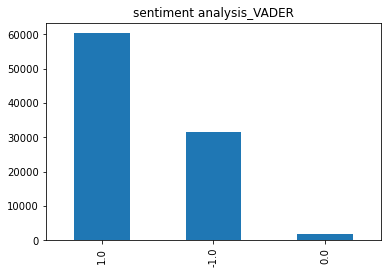

In [58]:
# Plot
result.compound_vader_polarity.value_counts().plot(kind='bar',title="sentiment analysis_VADER");

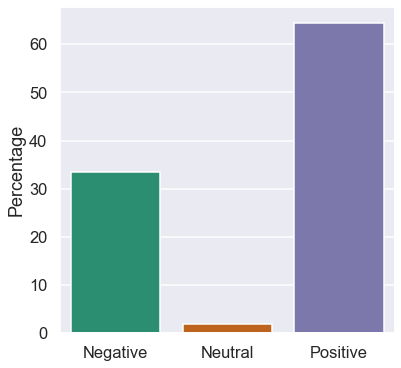

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='talk', palette='Dark2')
fig, ax = plt.subplots(figsize=(6, 6))
counts = result.compound_vader_polarity.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

### Download CSV (Sentiment Analysis Consolidated)

In [60]:
result.to_csv('lyrics_language_sentiment.csv')